### Raw Strings
In Python, we use `r` before the beginning quotation mark of a string -- single or double quote -- to declare a raw string. A raw string ignores all escape characters it might encounter and prints them. Python considers the backslash as part of the string and not as the start of an escape character. Raw strings are helpful if you are typing string values that contain many backslashes, such as the strings used for regular expressions (which we will cover in our next meeting).


In [5]:
print('The history of Budapest began when an early Celtic settlement transformed into the Roman town of Aquincum, \n the capital of Lower Pannonia.\n')

The history of Budapest began when an early Celtic settlement transformed into the Roman town of Aquincum, 
 the capital of Lower Pannonia.



### Multiline Strings with Triple Quotes
While you can use the `\n` escape character to put a newline into a string, it is often easier to use multiline strings. A multiline string in Python begins and ends with either three single quotes or three double quotes. Any quotes, tabs, or newlines in between the "triple quotes" are considered part of the string. Python's indentation rules for blocks do not apply to lines inside a multiline string.

In [6]:
#this a comment

budapest_paragraph ="""The history of Budapest began when an early Celtic settlement transformed into the Roman town of Aquincum,[15][16] the capital of Lower Pannonia.[15] The Hungarians arrived in the territory in the late 9th century.[17] 
The area was pillaged by the Mongols in 1241.[18] Buda, the settlements on the west bank of the river,
became one of the centres of Renaissance humanist culture by the 15th century.[19][20][21] 
The Battle of Mohács, in 1526, was followed by nearly 150 years of Ottoman rule.[22]
After the reconquest of Buda in 1686, the region entered a new age of prosperity. 
Pest-Buda became a global city with the unification of Buda, Óbuda, and Pest on 17 November 1873, with the name
'Budapest' given to the new capital.[12][23] Budapest also became the co-capital of the Austro-Hungarian Empire,
[24] a great power that dissolved in 1918, following World War I. The city was the focal point of the Hungarian 
Revolution of 1848, the Battle of Budapest in 1945, 
and the Hungarian Revolution of 1956.[25][26]"""

In [7]:
type(budapest_paragraph)

str

### Reading files 

We can import string from a file and store it in a variable. Let's do this using the file named `Hello.txt`.

In Python, we open a file using the `open()` method and pass the file you want to open. Usually, we can open a file to read or write. Main exceptions are pdf where we cannot only write a pdf combining information from existing pdfs. More on this later. Text files with the .txt extension or Python script files with the .py extension are examples of plaintext files. 

We are going to start reading and writing text files. Your programs can easily read the contents of plaintext files and treat them as an ordinary string value. (Binary files are all other file types, such as word processing documents, PDFs, images, spreadsheets, etc.)

In [8]:
import os

In [9]:
my_dir = "/Users/ariedamuco/Dropbox (CEU Econ)/TextAnalysisCEU"
#change the path with your own path

In [10]:
os.chdir(my_dir) #set directory uncommenting this cell

In [11]:
hello = open("Inputs/Hello.txt")

In [12]:
hello

<_io.TextIOWrapper name='Inputs/Hello.txt' mode='r' encoding='UTF-8'>

### Access Modes

Access modes define in which way you want to open a file, whether you want to open a file in:

-- read-only mode -- denoted by `r`, the default mode 

-- write-only mode -- denoted by `w` 

-- append mode -- denoted by `a` 

The most commonly used ones are read and write modes. Sometimes when looking for help on the internet you might encounter that the file is opened both in both read and write mode  -- denoted by `rw`. Be careful when using both read and write method contemporaneously as you may modify original files, which you usually do not want to. 

Now let's read the content of our file.

In [13]:
hello_string = hello.read()

In [14]:
type(hello_string)

str

In [15]:
budapest = open("Inputs/budapest.txt", mode='r', encoding = "utf-8" )

In [16]:
budapest.readlines()

['The history of Budapest began when an early Celtic settlement transformed into the Roman town of Aquincum, the capital of Lower Pannonia.\n',
 'The Hungarians arrived in the territory in the late 9th century.\n',
 ' The area was pillaged by the Mongols in 1241.\n',
 ' Buda, the settlements on the west bank of the river, became one of the centres of Renaissance humanist culture by the 15th century.']

In [17]:
type(budapest.readlines())

list

We can also write our own text files.

In [18]:
#os.mkdir("Output")

"""
try: 
    os.mkdir("Output") 
except OSError as error: 
    print(error) 
"""

'\ntry: \n    os.mkdir("Output") \nexcept OSError as error: \n    print(error) \n'

In [19]:
my_file = open("Output/first_file.txt",'w') 

In [20]:
my_file.write("This is the first file that I write with Python.")

48

To see what's writen in the file, we should first close the file. Remember that you have to tell Python explicitly to close a file. (Python, unfortunately, cannot read your mind.)

In [21]:
my_file.close()

An alternative is to use the `with` statement.
The with statement has two parts: a header and a body.
The header always starts with the with keyword and ends with a colon `(:)`. After the with statement header is an indented block of code. When code execution leaves the indented block, the file object assigned to
file is closed automatically, even if an exception is raised during execution of the code inside of the block.

```
with open("Output/first_file.txt",'w') as my_file:
    my_file.write("This is the first file that I write with Python.")
```


In [22]:
beatles = ["Paul","John","Ringo","George"]

In [23]:
with open("Output/Beatles.txt",'w') as my_file:
    for beatle in beatles:
        my_file.write(beatle + "\n")

In [24]:
f = open("Output/Beatles.txt",'r')
f.readlines()

['Paul\n', 'John\n', 'Ringo\n', 'George\n']

When you set mode="w" in .open(), the contents of the original file
are overwritten. This results in the loss of all of the original data
in the file! To see this, try to write the each beatle (as a separate line in the first_file.txt.)

In case you want to append the list to the first line you wrote previously, use append mode. When a file is opened in append mode, new data is written to the end
of the file and old data is left intact.

In [25]:
#!pip install Wikipedia

In [26]:
import wikipedia

In [27]:
wikipedia.search("Budapest")

['Budapest',
 'The Grand Budapest Hotel',
 'Budapest Highflyer',
 'Club of Budapest',
 'Siege of Budapest',
 'Budapest (disambiguation)',
 'Budapest Metro',
 'Budapest Live',
 'Budapest Ferenc Liszt International Airport',
 'Budapest Offensive']

In [28]:
budapest_wiki = wikipedia.page('Budapest')

In [29]:
budapest_wiki.title

'Budapest'

In [30]:
budapest_wiki.url

'https://en.wikipedia.org/wiki/Budapest'

In [31]:
budapest_summary = wikipedia.summary("Budapest")

In [32]:
budapest_summary

"Budapest (, Hungarian pronunciation: [ˈbudɒpɛʃt]) is the capital and the most populous city of Hungary, and the ninth-largest city in the European Union by population within city limits. The city has an estimated population of 1,752,286 over a land area of about 525 square kilometres (203 square miles). Budapest is both a city and county, and forms the centre of the Budapest metropolitan area, which has an area of 7,626 square kilometres (2,944 square miles) and a population of 3,303,786, comprising 33% of the population of Hungary.The history of Budapest began when an early Celtic settlement transformed into the Roman town of Aquincum, the capital of Lower Pannonia. The Hungarians arrived in the territory in the late 9th century, but the area was pillaged by the Mongols in 1241–42. Re-established Buda became one of the centres of Renaissance humanist culture by the 15th century.\nThe Battle of Mohács, in 1526, was followed by nearly 150 years of Ottoman rule. After the reconquest of 

In [33]:
budapest_content = budapest_wiki.content

In [34]:
budapest_content

'Budapest (, Hungarian pronunciation: [ˈbudɒpɛʃt]) is the capital and the most populous city of Hungary, and the ninth-largest city in the European Union by population within city limits. The city has an estimated population of 1,752,286 over a land area of about 525 square kilometres (203 square miles). Budapest is both a city and county, and forms the centre of the Budapest metropolitan area, which has an area of 7,626 square kilometres (2,944 square miles) and a population of 3,303,786, comprising 33% of the population of Hungary.The history of Budapest began when an early Celtic settlement transformed into the Roman town of Aquincum, the capital of Lower Pannonia. The Hungarians arrived in the territory in the late 9th century, but the area was pillaged by the Mongols in 1241–42. Re-established Buda became one of the centres of Renaissance humanist culture by the 15th century.\nThe Battle of Mohács, in 1526, was followed by nearly 150 years of Ottoman rule. After the reconquest of 

### Challenge: Write the string stored in the variable budapest_content in a file called `wiki-budapest-15-10-2020.txt`. Save the file in the `Inputs` folder. 

In [35]:
import re
budapest_content_clean = re.sub('[^a-zA-Z]+', ' ', budapest_content)

In [36]:
budapest_content_tokens = budapest_content_clean.lower().split()

In [37]:
budapest_content_tokens[0:10]

['budapest',
 'hungarian',
 'pronunciation',
 'bud',
 'p',
 't',
 'is',
 'the',
 'capital',
 'and']

### Challenge: Open the file nltk_stopwords.txt and store it's content in a list called `nltk_stopwords` where each element of the list is a line of the document. Use the method `replace()`  if needed.

In [38]:
nltk= open("Inputs/nltk_stopwords.txt", mode='r')
nltk_stopwords=[element.replace("\n","") for element in nltk.readlines()]

In [39]:
budapest_stopwords_removed = [word for word in budapest_content_tokens if word not in nltk_stopwords and len(word)>3]

In [40]:
from collections import Counter

dict_BP = Counter(budapest_stopwords_removed)
dict_BP

Counter({'budapest': 261,
         'hungarian': 86,
         'pronunciation': 2,
         'capital': 24,
         'populous': 3,
         'city': 152,
         'hungary': 76,
         'ninth': 1,
         'largest': 27,
         'european': 35,
         'union': 3,
         'population': 20,
         'within': 14,
         'limits': 4,
         'estimated': 2,
         'land': 2,
         'area': 20,
         'square': 44,
         'kilometres': 17,
         'miles': 7,
         'county': 4,
         'forms': 1,
         'centre': 23,
         'metropolitan': 7,
         'comprising': 1,
         'history': 9,
         'began': 2,
         'early': 9,
         'celtic': 1,
         'settlement': 4,
         'transformed': 1,
         'roman': 10,
         'town': 2,
         'aquincum': 9,
         'lower': 3,
         'pannonia': 3,
         'hungarians': 9,
         'arrived': 1,
         'territory': 6,
         'late': 8,
         'century': 26,
         'pillaged': 1,
         'mo

In [41]:
#conda install WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

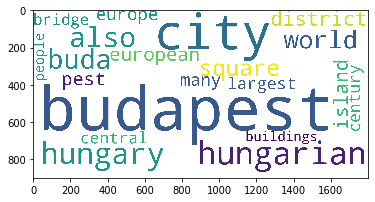

In [42]:
wc = WordCloud(width=1800, height=900, background_color="white",
               max_words = 20, relative_scaling = 0.5, 
               normalize_plurals = False).generate_from_frequencies(dict_BP)
plt.imshow(wc)

In [43]:
#write the dictionary in a text file
write_budapest = open('Output/Budapest_counter_freq.txt', 'w') 
write_budapest.write('word' + ";" + "frequency" + "\n")
for key, value in Counter(dict_BP).items():
    #print (key, value)
    write_budapest.write(key + ';' + str(value) + "\n")
write_budapest.close()

In [44]:
"""
# Using the csv library
import csv

with open('Output/Budapest_counter.csv', 'w') as csv_file:
    writer = csv.writer(csv_file, delimiter=';')
    writer.writerow(['word','frequency'])
    for key, value in dict_counts.items():
       writer.writerow([key, value])
"""

"\n# Using the csv library\nimport csv\n\nwith open('Output/Budapest_counter.csv', 'w') as csv_file:\n    writer = csv.writer(csv_file, delimiter=';')\n    writer.writerow(['word','frequency'])\n    for key, value in dict_counts.items():\n       writer.writerow([key, value])\n"

With Python we can open, read and write other types of files. One of them is `pdf` format. While we can read pdfs we cannot write pdf from scratch, we only write content that is already in pdf format. To do this, we'll use another third party module called PyPDF2. 

In [45]:
#install third party module
#! conda install PyPDF2

In [46]:
import PyPDF2

In [47]:
AEJ_health = open('Inputs/pdfs/app20170295.pdf', "rb") #read binary
reader_health = PyPDF2.PdfFileReader(AEJ_health)

In [48]:
reader_health

In [49]:
reader_health.numPages

31

In [50]:
page1_health = reader_health.getPage(0)

In [51]:
page1_health.extractText()

'American Economic Journal: Applied Economics 2019, 11(2): 302Œ332\n https://doi.org/10.1257/app.20170295\n302* Curto: Department of Health Policy and Management, T.H. Chan School of Public Health, Harvard University, \n677 Huntington Avenue, Boston, MA 02115-6028 \n(email: vcurto@hsph.harvard.edu); Einav: Department of \nEconomics, Stanford University, 579 Serra Mall, Stanford, CA 94305-6072 \n(email: leinav@stanford.edu) and \nNBER; Finkelstein: Department of Economics, MIT, 50 Memorial Drive, Cambridge, MA 02142-1347 \n(email: \nafink@mit.edu) and NBER; Levin: Graduate School of Business, Stanford University, 655 Knight Way, Stanford, \n\nCA 94305-7298 \n(email: jdlevin@stanford.edu\n) and NBER; Bhattacharya: School of Medicine, Stanford University, \n616 Serra Street, Stanford, CA 94305-6019 (email: jay@stanford.edu). Ilyana Kuziemko was coeditor for this \n\narticle. We are grateful to Diego Jimenez, Andelyn Russell, Daniel Salmon, and Martina Uccioli for excellent \n\nresearch as

In [52]:
writer_AEJ_health=PyPDF2.PdfFileWriter()

In [53]:
writer_AEJ_health.addPage(page1_health)

In [54]:
outputFile_health=open('Output/AEJ_health_abstract.pdf','wb')
writer_AEJ_health.write(outputFile_health)
outputFile_health.close()

In [55]:
#read other AEJ file
AEJ_temperature=open('Inputs/pdfs/app20170223.pdf', "rb") 
reader_temperature=PyPDF2.PdfFileReader(AEJ_temperature)
page1_temperature=reader_temperature.getPage(0)

In [56]:
writer_AEJ=PyPDF2.PdfFileWriter()
writer_AEJ.addPage(page1_temperature)
writer_AEJ.addPage(page1_health)
outputFile=open('Output/AEJ_combined.pdf','wb')
writer_AEJ.write(outputFile)
outputFile.close()

### Challenge: Write a function that combines odd pages from `app20170295.pdf` and even pages from  `app20170223.pdf `. 

### References 
https://www.datacamp.com/community/tutorials/reading-writing-files-python

https://automatetheboringstuff.com/chapter6

https://pypi.org/project/wikipedia/

https://medium.com/@Alexander_H/scraping-wikipedia-with-python-8000fc9c9e6c

https://automatetheboringstuff.com/chapter8/

https://automatetheboringstuff.com/chapter13/